In [330]:
import os 
import warnings 
import urllib.request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download data

In [7]:
url = 'https://www.cbs.gov.il/he/publications/doclib/2019/hamakomiot1999_2017/p_libud_21.xlsx'
filename = os.path.join('data', 'raw_data.xlsx')
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

## Preprocessing

Be sure to separate merged columns in the raw data.

In [266]:
dataset = pd.read_excel(os.path.join('data', 'processed_data.xlsx'), sheet_name=1, header=[1], index_col=0)
dataset.columns = dataset.columns.str.split('.').str[0]
dataset.iloc[0] = dataset.iloc[0].replace(np.nan, 2021)
dataset

,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,כללי,...,יישובים במועצות אזוריות,יישובים במועצות אזוריות,יישובים במועצות אזוריות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות,בחירות מוניציפליות וארציות
שנת עדכון: 2021\n(אלא אם כן צוין אחרת),2021,2021,2021,2020,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
שם הרשות,סמל הרשות,מחוז,מעמד מוניציפלי,"מרחק מגבול מחוז תל אביב (ק""מ)",שנת קבלת מעמד מוניציפלי,"מרחב ימי, רשויות מקומיות הגובלות בחוף הים",מספר חברי מועצה,סמל ועדת תכנון ובנייה,שם ועדת תכנון ובנייה,"שטח \n(קמ""ר)",...,יישובים קהילתיים,"יישובים מוסדיים, לא-יהודיים","יישובים כפריים אחרים, לא-יהודיים",בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18,בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18,בחירות לכנסת ה-21\n9/4/19,בחירות לכנסת ה-22\n17/9/19,בחירות לכנסת ה-23\n02/03/20,בחירות לכנסת ה-24\n23/03/21,בחירות לכנסת ה-25\n01/11/22
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה,אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


In [267]:
dataset.columns = dataset.columns + ' ' + \
    np.array(dataset.iloc[1, :].replace(np.nan,'',regex=True).astype(str).tolist())\
      + ' ' + np.array(dataset.iloc[0, :].replace(np.nan,'',regex=True).astype(str).tolist())\
            + ' ' + np.array(dataset.iloc[2, :].replace(np.nan,'',regex=True).astype(str).tolist()) 

dataset = dataset.iloc[3:, :]
dataset

,כללי סמל הרשות 2021,כללי מחוז 2021,כללי מעמד מוניציפלי 2021,"כללי מרחק מגבול מחוז תל אביב (ק""מ) 2020",כללי שנת קבלת מעמד מוניציפלי 2021,"כללי מרחב ימי, רשויות מקומיות הגובלות בחוף הים 2021",כללי מספר חברי מועצה 2021,כללי סמל ועדת תכנון ובנייה 2021,כללי שם ועדת תכנון ובנייה 2021,"כללי שטח \n(קמ""ר) 2021",...,יישובים במועצות אזוריות יישובים קהילתיים 2021,"יישובים במועצות אזוריות יישובים מוסדיים, לא-יהודיים 2021","יישובים במועצות אזוריות יישובים כפריים אחרים, לא-יהודיים 2021",בחירות מוניציפליות וארציות בחירות מוניציפליות לראש ראשות - סבב א\n30/10/18 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות מוניציפליות לראש ראשות - סבב ב\n13/11/18 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות לכנסת ה-21\n9/4/19 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות לכנסת ה-22\n17/9/19 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות לכנסת ה-23\n02/03/20 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות לכנסת ה-24\n23/03/21 2021 אחוזי הצבעה,בחירות מוניציפליות וארציות בחירות לכנסת ה-25\n01/11/22 2021 אחוזי הצבעה
אום אל-פחם,2710,חיפה,עירייה,57.773946,1984,0,17,354,עירון,26.028286,...,-,-,-,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535
אופקים,0031,הדרום,עירייה,86.782521,1995,0,15,601,אופקים,16.352399,...,-,-,-,68.88,-,65.499785,66.482978,67.193948,60.958874,68.598428
אור יהודה,2400,תל אביב,עירייה,0,1988,0,15,510,אור יהודה,6.730024,...,-,-,-,65.75,-,69.558284,69.94406,70.079792,66.773592,72.438495
אור עקיבא,1020,חיפה,עירייה,39.522842,2001,0,13,353,יישובי הברון,5.546,...,-,-,-,65.47,-,62.970361,62.729124,64.580851,59.381139,63.940933
אילת,2600,הדרום,עירייה,321.396453,1959,0,17,602,אילת,101.492515,...,-,-,-,46.24,39.410706,45.425811,45.192821,44.867295,41.323429,43.023435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שדות נגב,39,הדרום,מועצה אזורית,-,1951,0,16,651,נגב מערבי,113.471483,...,-,-,-,-,-,81.729151,79.310345,80.885464,77.239354,79.363057
שומרון,72,אזור יהודה והשומרון,מועצה אזורית,-,1979,0,30,710,שומרון,..,...,11,-,-,68.061674,-,81.416414,79.419416,79.461688,78.058474,78.459105
שער הנגב,37,הדרום,מועצה אזורית,-,1950,0,11,651,נגב מערבי,176.157962,...,-,-,-,62.297168,-,73.120998,71.760964,71.619614,70.458212,69.742954
שפיר,34,הדרום,מועצה אזורית,-,1950,0,15,631,שפיר,81.696426,...,-,-,-,83.732057,-,81.90667,80.957114,82.18407,79.654433,83.079655


In [268]:
def normalize_column_names(df):
    df.columns = df.columns.str.rstrip()
    df.columns = df.columns.str.replace(',', '')
    df.columns = df.columns.str.replace('(', '')
    df.columns = df.columns.str.replace(')', '')
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('__', '_')
    df.columns = df.columns.str.replace('"', '')
    df.columns = df.columns.str.replace("'", '')
    df.columns = df.columns.str.replace('\n', '')
    return df

dataset = normalize_column_names(dataset)

In [269]:
# Define a function to replace values with NaN
def replace_exact_dash_dot(value):
    if isinstance(value, str):
        return np.nan if value.strip() in ['-', '..', '.'] else value
    return np.nan if value in ['-', '..', '.'] else value

# Apply the function to each cell in the DataFrame
dataset = dataset.map(replace_exact_dash_dot)

## Name all cities and features

In [211]:
dataset.columns.tolist()

['כללי_סמל_הרשות_2021',
 'כללי_מחוז_2021',
 'כללי_מעמד_מוניציפלי_2021',
 'כללי_מרחק_מגבול_מחוז_תל_אביב_קמ__2020',
 'כללי_שנת_קבלת_מעמד_מוניציפלי__2021',
 'כללי_מרחב_ימי_רשויות_מקומיות_הגובלות_בחוף_הים_2021',
 'כללי_מספר_חברי_מועצה_2021',
 'כללי_סמל_ועדת_תכנון_ובנייה_2021',
 'כללי_שם_ועדת_תכנון_ובנייה_2021',
 'כללי_שטח_קמר_2021',
 'דמוגרפיה_צפיפות_אוכלוסייה_לקמר_ביישובים_שמנו_5000_תושבים_ויותר_2021',
 'דמוגרפיה_סהכ_אוכלוסייה_בסוף_השנה_2021',
 'דמוגרפיה_יהודים_ואחרים_אחוזים_2021',
 'דמוגרפיה_יהודים_אחוזים_מתוך_יהודים_ואחרים_2021',
 'דמוגרפיה_ערבים_אחוזים_2021',
 'דמוגרפיה_מוסלמים_אחוזים_מתוך_האוכלוסייה_הערבית_2021',
 'דמוגרפיה_נוצרים_אחוזים_מתוך_האוכלוסייה_הערבית_2021',
 'דמוגרפיה_דרוזים_אחוזים_מתוך_האוכלוסייה_הערבית_2021',
 'דמוגרפיה_סהכ_גברים_בסוף_השנה_2021',
 'דמוגרפיה_סהכ_נשים_בסוף_השנה_2021',
 'דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_4-0',
 'דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_9-5',
 'דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_14-10',
 'דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנ

In [219]:
dataset.index.tolist()

['אום אל-פחם',
 'אופקים',
 'אור יהודה',
 'אור עקיבא',
 'אילת',
 'אלעד',
 'אריאל',
 'אשדוד',
 'אשקלון',
 'באקה אל-גרביה',
 'באר יעקב',
 'באר שבע',
 'בית שאן',
 'בית שמש',
 'ביתר עילית',
 'בני ברק',
 'בת ים',
 'גבעת שמואל',
 'גבעתיים',
 'דימונה',
 'הוד השרון',
 'הרצלייה',
 'חדרה',
 'חולון',
 'חיפה',
 'טבריה',
 'טייבה',
 'טירה',
 'טירת כרמל',
 'טמרה',
 'יבנה',
 'יהוד-מונוסון',
 'יקנעם עילית',
 'ירושלים',
 'כפר יונה',
 'כפר סבא',
 'כפר קאסם',
 'כרמיאל',
 'לוד',
 'מגאר',
 'מגדל העמק',
 'מודיעין-מכבים-רעות',
 'מודיעין עילית',
 'מעלה אדומים',
 'מעלות-תרשיחא',
 'נהרייה',
 'נוף הגליל',
 'נס ציונה',
 'נצרת',
 'נשר',
 'נתיבות',
 'נתניה',
 "סח'נין",
 'עכו',
 'עפולה',
 'עראבה',
 'ערד',
 'פתח תקווה',
 'צפת',
 'קלנסווה',
 'קריית אונו',
 'קריית אתא',
 'קריית ביאליק',
 'קריית גת',
 'קריית ים',
 'קריית מוצקין',
 'קריית מלאכי',
 'קריית שמונה',
 'ראש העין',
 'ראשון לציון',
 'רהט',
 'רחובות',
 'רמלה',
 'רמת גן',
 'רמת השרון',
 'רעננה',
 'שדרות',
 'שפרעם',
 'תל אביב -יפו',
 'אבו גוש',
 'אבו סנאן',
 'אבן יהו

## Feature engineering

In [309]:
def create_per_capita_feature(df, feature):
    df[feature + "_לאדם"] = df[feature].astype(float) / df['דמוגרפיה_סהכ_אוכלוסייה_בסוף_השנה_2021'].astype(float)
    return df


feature = 'שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021'
dataset = create_per_capita_feature(dataset, feature)
dataset[feature + "_לאדם"]

אום אל-פחם    0.089169
אופקים        0.092179
אור יהודה     0.112644
אור עקיבא     0.116923
אילת          0.259815
                ...   
שדות נגב      0.078376
שומרון        0.069400
שער הנגב      0.078161
שפיר          0.069245
תמר           0.109415
Name: שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021_לאדם, Length: 255, dtype: float64

## Similarity functions

In [224]:
def find_most_similar(df, city, feature):
    sim_dataset = df[[feature]].copy()
    city_feature = sim_dataset.loc[city][feature]

    sim_dataset[f'מרחק_{feature}'] = sim_dataset[feature].apply(lambda x: np.abs(x - city_feature))
    return sim_dataset[[feature, f'מרחק_{feature}']].sort_values(by=f'מרחק_{feature}')

city = "הרצלייה"
feature = 'דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_17-0'
find_most_similar(dataset, city, feature).head(5)

,דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_17-0,מרחק_דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_17-0
הרצלייה,24.831104,0.000000
כפר ורדים,24.841801,0.010697
קריית ביאליק,24.783322,0.047782
אילת,24.779633,0.051471
קריית שמונה,24.892550,0.061446


## Correlation analysis

In [311]:
numerical_features = dataset.select_dtypes(include=['number'])
numerical_features.head(3)

,כללי_מרחק_מגבול_מחוז_תל_אביב_קמ__2020,כללי_מספר_חברי_מועצה_2021,כללי_שטח_קמר_2021,דמוגרפיה_צפיפות_אוכלוסייה_לקמר_ביישובים_שמנו_5000_תושבים_ויותר_2021,דמוגרפיה_סהכ_אוכלוסייה_בסוף_השנה_2021,דמוגרפיה_יהודים_ואחרים_אחוזים_2021,דמוגרפיה_יהודים_אחוזים_מתוך_יהודים_ואחרים_2021,דמוגרפיה_ערבים_אחוזים_2021,דמוגרפיה_מוסלמים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,דמוגרפיה_נוצרים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,...,יישובים_במועצות_אזוריות_יישובים_כפריים_אחרים_לא-יהודיים_2021,בחירות_מוניציפליות_וארציות_בחירות_מוניציפליות_לראש_ראשות_-_סבב_א30/10/18_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_מוניציפליות_לראש_ראשות_-_סבב_ב13/11/18_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-219/4/19_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2217/9/19_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2302/03/20_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2423/03/21_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2501/11/22_2021_אחוזי_הצבעה,שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021_ממוצע,שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021_לאדם
אום אל-פחם,57.773946,17,26.028286,2221.1,57677,NaN,NaN,99.9,100.0,NaN,...,NaN,74.24,66.818194,45.135369,51.334527,63.103806,33.147473,38.285535,0.089169,0.089169
אופקים,86.782521,15,16.352399,2079.1,33999,99.3,93.4,NaN,NaN,NaN,...,NaN,68.88,NaN,65.499785,66.482978,67.193948,60.958874,68.598428,0.092179,0.092179
אור יהודה,0.000000,15,6.730024,5470.2,36815,99.8,97.6,NaN,NaN,NaN,...,NaN,65.75,NaN,69.558284,69.944060,70.079792,66.773592,72.438495,0.112644,0.112644


In [312]:
corr_df = numerical_features.corr()

In [342]:
corr_df.head(50)

,כללי_מרחק_מגבול_מחוז_תל_אביב_קמ__2020,כללי_מספר_חברי_מועצה_2021,כללי_שטח_קמר_2021,דמוגרפיה_צפיפות_אוכלוסייה_לקמר_ביישובים_שמנו_5000_תושבים_ויותר_2021,דמוגרפיה_סהכ_אוכלוסייה_בסוף_השנה_2021,דמוגרפיה_יהודים_ואחרים_אחוזים_2021,דמוגרפיה_יהודים_אחוזים_מתוך_יהודים_ואחרים_2021,דמוגרפיה_ערבים_אחוזים_2021,דמוגרפיה_מוסלמים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,דמוגרפיה_נוצרים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,...,יישובים_במועצות_אזוריות_יישובים_כפריים_אחרים_לא-יהודיים_2021,בחירות_מוניציפליות_וארציות_בחירות_מוניציפליות_לראש_ראשות_-_סבב_א30/10/18_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_מוניציפליות_לראש_ראשות_-_סבב_ב13/11/18_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-219/4/19_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2217/9/19_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2302/03/20_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2423/03/21_2021_אחוזי_הצבעה,בחירות_מוניציפליות_וארציות_בחירות_לכנסת_ה-2501/11/22_2021_אחוזי_הצבעה,שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021_ממוצע,שכר_ורווחה_מספר_מקבלי_דמי_אבטלה_סהכ_שנתי_2021_לאדם
כללי_מרחק_מגבול_מחוז_תל_אביב_קמ__2020,1.000000,-0.360585,0.142188,-0.509480,-0.234625,-0.145677,-0.349596,-0.058994,-0.334226,0.039561,...,NaN,0.144750,0.135572,-0.462828,-0.523156,-0.506970,-0.466797,-0.556435,0.423455,0.423455
כללי_מספר_חברי_מועצה_2021,-0.360585,1.000000,0.124217,0.449913,0.422490,-0.304194,-0.028653,-0.739541,0.118918,-0.349292,...,-0.206353,-0.393541,-0.438181,0.246237,0.196656,0.150568,0.256435,0.235307,-0.061433,-0.061433
כללי_שטח_קמר_2021,0.142188,0.124217,1.000000,-0.122222,-0.034082,-0.036477,-0.007475,-0.355302,0.073917,-0.169534,...,-0.311485,-0.160010,-0.051993,0.121538,0.064180,0.022782,0.119583,0.055991,-0.098469,-0.098469
דמוגרפיה_צפיפות_אוכלוסייה_לקמר_ביישובים_שמנו_5000_תושבים_ויותר_2021,-0.509480,0.449913,-0.122222,1.000000,0.342735,0.038265,0.097919,-0.339110,0.234631,-0.091450,...,NaN,-0.313835,-0.359616,0.235811,0.235326,0.173019,0.271133,0.286072,-0.078007,-0.078007
דמוגרפיה_סהכ_אוכלוסייה_בסוף_השנה_2021,-0.234625,0.422490,-0.034082,0.342735,1.000000,-0.318836,-0.147758,-0.347884,0.051016,-0.094452,...,-0.135327,-0.370419,-0.299772,0.035518,-0.013501,-0.047287,0.034381,0.022036,-0.026777,-0.026777
דמוגרפיה_יהודים_ואחרים_אחוזים_2021,-0.145677,-0.304194,-0.036477,0.038265,-0.318836,1.000000,0.256482,-1.000000,-0.001580,-0.095323,...,-0.633131,0.177584,0.082880,0.396721,0.315984,0.271012,0.386865,0.362455,-0.237367,-0.237367
דמוגרפיה_יהודים_אחוזים_מתוך_יהודים_ואחרים_2021,-0.349596,-0.028653,-0.007475,0.097919,-0.147758,0.256482,1.000000,-0.095905,0.727082,-0.802292,...,-0.065943,0.497971,0.448918,0.789750,0.792428,0.804123,0.795517,0.802756,-0.398555,-0.398555
דמוגרפיה_ערבים_אחוזים_2021,-0.058994,-0.739541,-0.355302,-0.339110,-0.347884,-1.000000,-0.095905,1.000000,-0.061002,0.294249,...,0.270767,0.548958,0.269870,-0.407780,-0.208039,-0.076864,-0.467432,-0.322275,-0.207168,-0.207168
דמוגרפיה_מוסלמים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,-0.334226,0.118918,0.073917,0.234631,0.051016,-0.001580,0.727082,-0.061002,1.000000,-0.576270,...,0.084656,0.021666,-0.170946,-0.106824,0.205927,0.313175,-0.049544,0.175789,-0.040623,-0.040623
דמוגרפיה_נוצרים_אחוזים_מתוך_האוכלוסייה_הערבית_2021,0.039561,-0.349292,-0.169534,-0.091450,-0.094452,-0.095323,-0.802292,0.294249,-0.576270,1.000000,...,0.551074,0.220922,0.425964,-0.240281,0.021909,0.009009,-0.095770,-0.036572,-0.051425,-0.051425


In [324]:
feature_name =  'חינוך_והשכלה_השכלה_גבוהה_תשפב_2021/22_אחוז_בעלי_תארים_מישראל_מתוך_אוכלוסיית_בני_55-35'
corr_df[[feature_name]].sort_values(by=feature_name, ascending=False).head(10)

,חינוך_והשכלה_השכלה_גבוהה_תשפב_2021/22_אחוז_בעלי_תארים_מישראל_מתוך_אוכלוסיית_בני_55-35
חינוך_והשכלה_השכלה_גבוהה_תשפב_2021/22_אחוז_בעלי_תארים_מישראל_מתוך_אוכלוסיית_בני_55-35,1.000000
שכר_ורווחה_שכר_ממוצע_לחודש_של_שכירים_שח_2019_כלל_השכירים,0.898052
שכר_ורווחה_שכר_ממוצע_לחודש_של_שכירים_שח_2021_גברים,0.892829
שכר_ורווחה_שכר_ממוצע_לחודש_של_שכירים_שח_2021_נשים,0.881266
מדד_חברתי-כלכלי_דירוגמ-1_עד_255_1_הנמוך_ביותר__2019,0.877897
מדד_חברתי-כלכלי_אשכולמ-1_עד_10_1_הנמוך_ביותר__2019,0.861778
מדד_חברתי-כלכלי_ערך_מדד__2019,0.859657
שכר_ורווחה_דמי_אבטלה_ממוצעים_ליוםשח_2021,0.821361
בריאות_תוחלת_חייםבלידה_סך_הכל_2017_-_2021_בערים_המונות_50000_תושבים_ויותר,0.817252
חינוך_והשכלה_השכלה_גבוהה_2021_אחוז_הנכנסים_להשכלה_גבוהה_בתוך_8_שנים_בקרב_תלמידי_יב,0.782002


In [344]:
feature_name =  'דמוגרפיה_שיעור_פריון_כולל_2021'
corr_df[[feature_name]].sort_values(by=feature_name, ascending=False).head(20)

,דמוגרפיה_שיעור_פריון_כולל_2021
דמוגרפיה_שיעור_פריון_כולל_2021,1.000000
דמוגרפיה_ריבוי_טבעי_ל-1000_תושבים_2021,0.900185
דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_4-0,0.892476
דמוגרפיה_יחס_תלות_ל-1000_תושבים_בלתי_תלויים_2021,0.883508
דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_9-5,0.865218
דמוגרפיה_אחוז_באוכלוסייה_בסוף_השנה_2021_בני_17-0,0.850725
יישובים_במועצות_אזוריות_יישובים_לא_יהודיים_2000-4999_תושבים_2021,0.830705
יישובים_במועצות_אזוריות_יישובים_יהודיים_2000-4999_תושבים_2021,0.746772
שכר_ורווחה_מקבלי_הכשרה_מקצועיתסהכ_2021,0.744042
דמוגרפיה_נישאים_2020_שיעור_ל-1000_תושבים_לא_נשואים_בני_15_ומעלה,0.700416


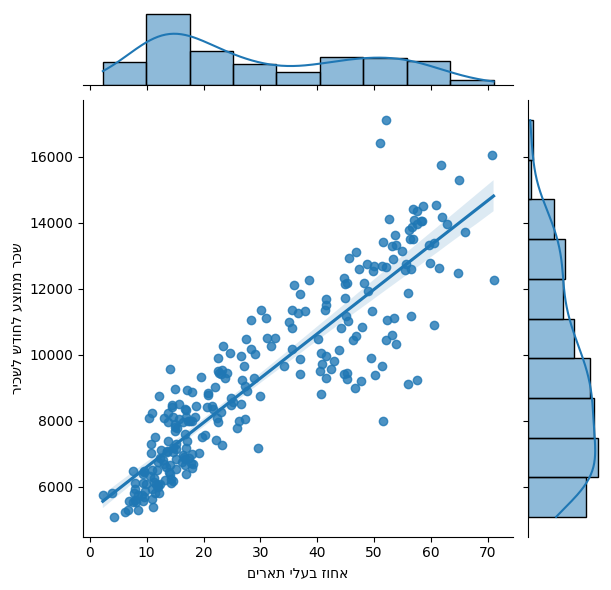

In [340]:
warnings.filterwarnings('ignore')
feature1 = 'חינוך_והשכלה_השכלה_גבוהה_תשפב_2021/22_אחוז_בעלי_תארים_מישראל_מתוך_אוכלוסיית_בני_55-35'
feature2 = 'שכר_ורווחה_שכר_ממוצע_לחודש_של_שכירים_שח_2019_כלל_השכירים'
joint_plot = sns.jointplot(x=feature1, 
              y=feature2, 
              data=dataset, 
              kind='reg')

# Set custom labels
joint_plot.set_axis_labels("אחוז בעלי תארים"[::-1], "שכר ממוצע לחודש לשכיר"[::-1])

# Show the plot
plt.show()
warnings.filterwarnings('default')
